## Logistic regression
Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic

In [1]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

In [3]:
# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)

In [4]:
# LogisticRegression
regressor = LogisticRegression(random_state=0)
regressor.fit(X_train, y_train)

C:\Users\Rakesh_PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [7]:
# Prediction
y_pred = regressor.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.49122807017544


### What is Logistic Regression?

Logistic Regression is a **“Supervised machine learning”** algorithm that can be used to model the probability of a certain class or event. **`It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.`**

That means Logistic regression is usually used for **Binary classification problems.**

Binary Classification refers to predicting the output variable that is discrete in two classes.

A few examples of Binary classification are Yes/No, Pass/Fail, Win/Lose, Cancerous/Non-cancerous, etc.

#### Types of Logistic Regression
- **Simple Logistic Regression:** a single independent variable is used to predict the output
- **Multiple logistic regression:** multiple independent variables are used to predict the output

#### Extensions of Logistic Regression

- **Multinomial Logistic Regression:** The output variable is discrete in three or more classes with no natural ordering.

Food texture: Crunchy, Mushy, Crispy

Hair colour: Blonde, Brown, Brunette, Red​

- **Ordered Logistic Regression:** Aka Ordinal regression model. The output variable is discrete in three or more classes with the ordering of the levels.

Customer Rating: extremely dislike, dislike, neutral, like, extremely like

Income level: low income, middle income, high income

**Q:- The two limitations of using a linear regression model for classification problems are:**

>1. The predicted value may exceed the range (0,1)
>2. Error rate increases if the data has outliers

### Implementation in Python using Scikit-learn library
For classification,We are using a popular Fish dataset from Kaggle. 

In [11]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"

In [13]:
fish = pd.read_csv(dataset_url, error_bad_lines=False)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
fish.shape

(159, 7)

In [15]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [16]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [20]:
#Checking unique categories of the target feature. 
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [21]:
fish['Species'].nunique()
#Our dataset has information about 7 fish species

7

In [19]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [22]:
# Check if there are any null values. Our dataset has no null values.
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [23]:
#Defining independent and target variables

X = fish.iloc[:, 1:]
y = fish.loc[:, 'Species']

In [24]:
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [25]:
y.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [26]:
# Scaling the input features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [27]:
# Label Encoding the target variable using LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [28]:
# Splitting into train and test datasets using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Model Building and training

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predicting the output

y_pred = clf.predict(X_test)

In [31]:
y_pred

array([2, 5, 2, 2, 2, 0, 5, 2, 2, 3, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 5, 0,
       0, 0, 0, 2, 2, 2, 5, 5, 3, 2])

In [35]:
# Computing the accuracy

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


Text(0.5, 1.0, 'Confusion Matrix')

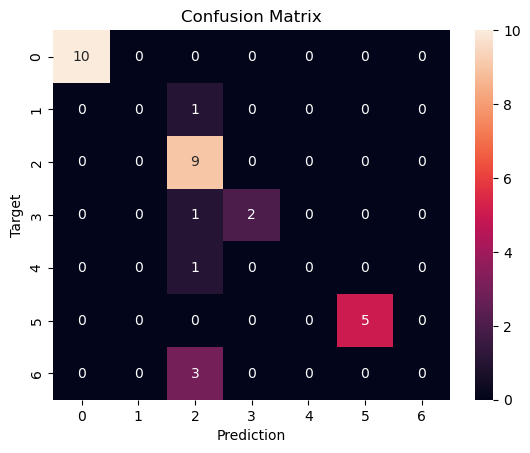

In [36]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')